<a href="https://colab.research.google.com/github/Moshiii/pytorch_snippet/blob/master/sum_10_pytorch_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
import torch
import random
from torchsummary import summary
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
class Feedforward(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Feedforward, self).__init__()
    self.input_size = input_size
    self.hidden_size  = hidden_size
    self.output_size = output_size 
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(self.hidden_size, output_size)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [0]:
import seaborn as sns
class ModelLog:

  def __init__(self, model):
      self.rec_dic={0:[],1:[]}
      self.model = model
      self.idx=0
  def model_weight_vis(self):
      model_list = [m for m in self.model.modules()]
      w_layer_1 = model_list[1].weight.data.clone()
      w_layer_2 = model_list[3].weight.data.clone()
      self.rec_dic[0].append(w_layer_1.clone())
      self.rec_dic[1].append(w_layer_2.clone())

  def show_tensor(self,dataset):
    self.idx+=1
    ds=dataset.numpy()
    # sns.set()
    # fig = plt.figure()
    # plt.figure(self.idx)
    plt.figure(self.idx,figsize=(16, 16))
    # sns.heatmap(data=dataset, ax=fig)
    # ax = sns.heatmap(dataset)
    sns.heatmap(ds, annot=True,  linewidths=.5)
    # plt.figure()
    # plt.imshow(ds)
    # plt.colorbar(ds)

  def print_tensor(self,tsr):
    numpy.set_printoptions(suppress=True)
    print(numpy.round(tsr.numpy(), decimals=2))

  def dump_all_weights(self):
    #self.dump_weight(self.rec_dic[0])
    self.dump_weight(self.rec_dic[1])

  def dump_weight(self,tensor_list):
      for i,t in enumerate(tensor_list):
        if i>1:
          self.show_tensor((tensor_list[i]-tensor_list[i-1])*100/tensor_list[i])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def get_sum_data(n_samples=55,shuffle=True):
  numbers=list(range(0,10))
  pair=[]
  for a in numbers:
    for b in numbers:
      if a+b<10:
        y_scatter=[0]*10
        y_scatter[a+b]=1
        pair+=[[[a,b],y_scatter]]
  random.shuffle(pair)
  pair=pair[:n_samples] 
  x_train = [x[0] for x in pair]
  y_train = [y[1] for y in pair]
  return x_train, y_train
#get_sum_data(5)

In [0]:
FF_model = Feedforward(2, 10, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(FF_model.parameters(), lr = 0.015)

In [0]:
x_train, y_train = get_sum_data(55)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test, y_test = get_sum_data(5)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)



In [0]:
#ModelLog.show_tensor(x_test)
#ModelLog.show_tensor(y_test)

In [0]:
def one_hot_to_num(one_hot):
  return [i for i, j in enumerate(a)if j == max(a)]


In [0]:
FF_model.eval()
y_pred = FF_model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.702985942363739


In [0]:
FF_model.train()
epoch = 1000000

record_tracker= ModelLog(FF_model)

for epoch in range(epoch):
    FF_model.train()
    optimizer.zero_grad()
    # record_tracker.model_weight_vis()
    y_pred = FF_model(x_train)# foward    
    loss = criterion(y_pred.squeeze(), y_train)
   
    loss.backward()
    optimizer.step()

    if epoch % 50000 == 0:
      record_tracker.model_weight_vis()
      print('Epoch {}: train loss: {}'.format(epoch, loss.item())) 
      FF_model.eval()
      y_pred = FF_model(x_test) 
      before_train = criterion(y_pred.squeeze(), y_test)
      print('Test loss before training================' , before_train.item())
record_tracker.dump_all_weights()

Epoch 0: train loss: 0.6742665767669678
Test loss before training================ 0.7001854777336121
Epoch 50000: train loss: 0.20742978155612946
Test loss before training================ 0.18431341648101807
Epoch 100000: train loss: 0.1537599414587021
Test loss before training================ 0.13680143654346466
Epoch 150000: train loss: 0.1164688840508461
Test loss before training================ 0.09516242891550064
Epoch 200000: train loss: 0.08714789897203445
Test loss before training================ 0.06459072232246399
Epoch 250000: train loss: 0.06669386476278305
Test loss before training================ 0.04710087925195694
Epoch 300000: train loss: 0.051442135125398636
Test loss before training================ 0.03587239980697632
Epoch 350000: train loss: 0.03971683979034424
Test loss before training================ 0.027469558641314507
Epoch 400000: train loss: 0.031147994101047516
Test loss before training================ 0.02114470675587654
Epoch 450000: train loss: 0.0244962

KeyboardInterrupt: ignored

In [0]:
FF_model.eval()
y_pred = FF_model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print(x_test)
print(y_pred)
for a in y_pred:
  res = one_hot_to_num(a)
  print(res)

tensor([[3., 1.],
        [8., 0.],
        [5., 1.],
        [7., 2.],
        [6., 3.]])
tensor([[1.6831e-25, 2.2437e-10, 2.0236e-12, 1.4831e-02, 9.6651e-01, 3.6314e-02,
         4.8108e-11, 5.6684e-11, 1.7277e-27, 9.6035e-32],
        [0.0000e+00, 2.2656e-33, 0.0000e+00, 6.3516e-33, 4.6939e-15, 6.9664e-16,
         8.8582e-05, 6.2002e-02, 8.9579e-01, 2.6503e-03],
        [0.0000e+00, 9.4565e-22, 3.1380e-34, 4.7021e-16, 1.3101e-06, 2.8785e-02,
         9.4247e-01, 5.9387e-02, 2.8496e-10, 6.7890e-17],
        [0.0000e+00, 5.0855e-39, 0.0000e+00, 0.0000e+00, 5.7499e-19, 9.4924e-21,
         4.4185e-07, 9.1104e-07, 5.0364e-02, 9.9782e-01],
        [0.0000e+00, 5.9115e-39, 0.0000e+00, 0.0000e+00, 4.5158e-19, 1.0538e-20,
         4.3857e-07, 9.2647e-07, 4.9635e-02, 9.9780e-01]],
       grad_fn=<SigmoidBackward>)
[4]
[8]
[6]
[9]
[9]


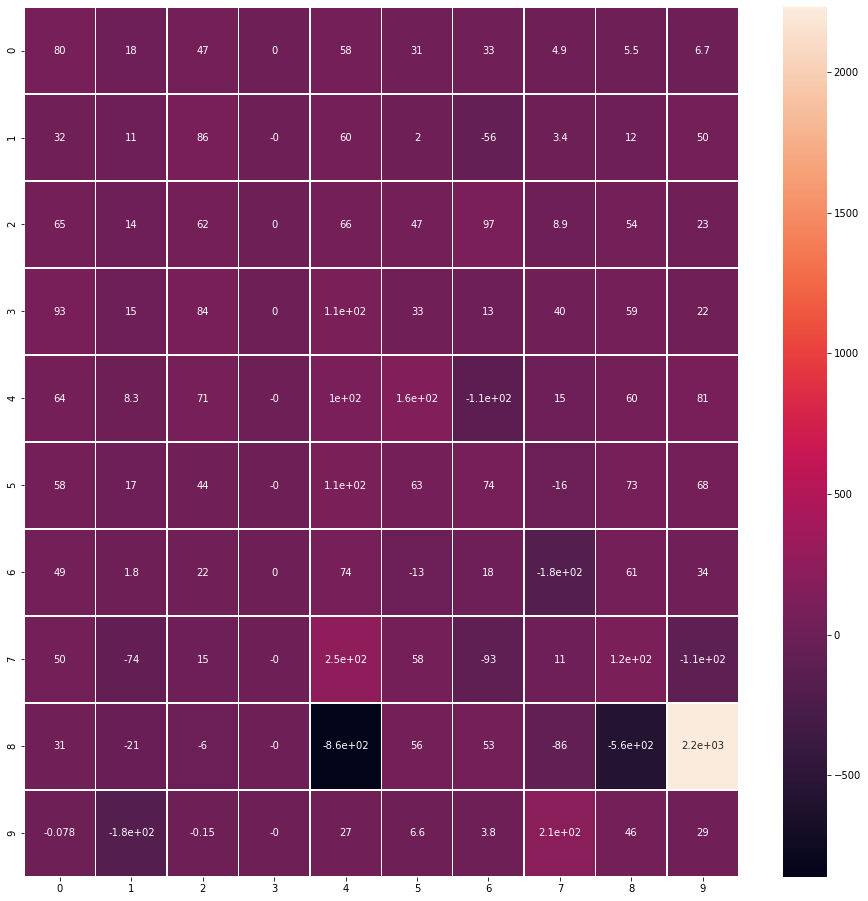

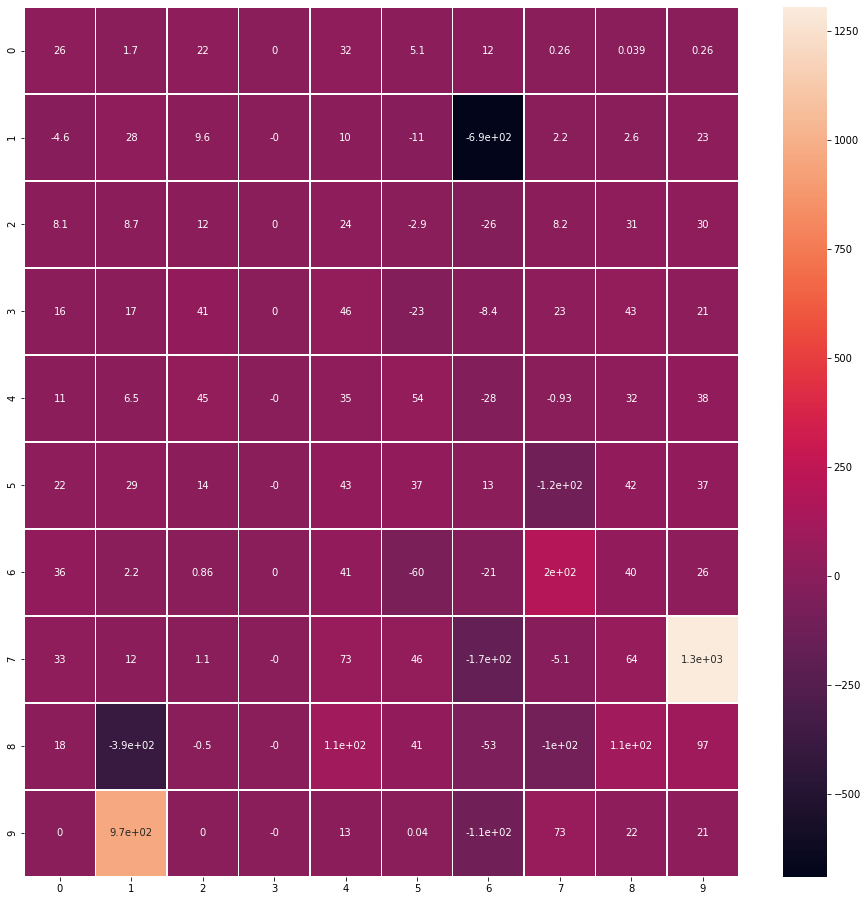

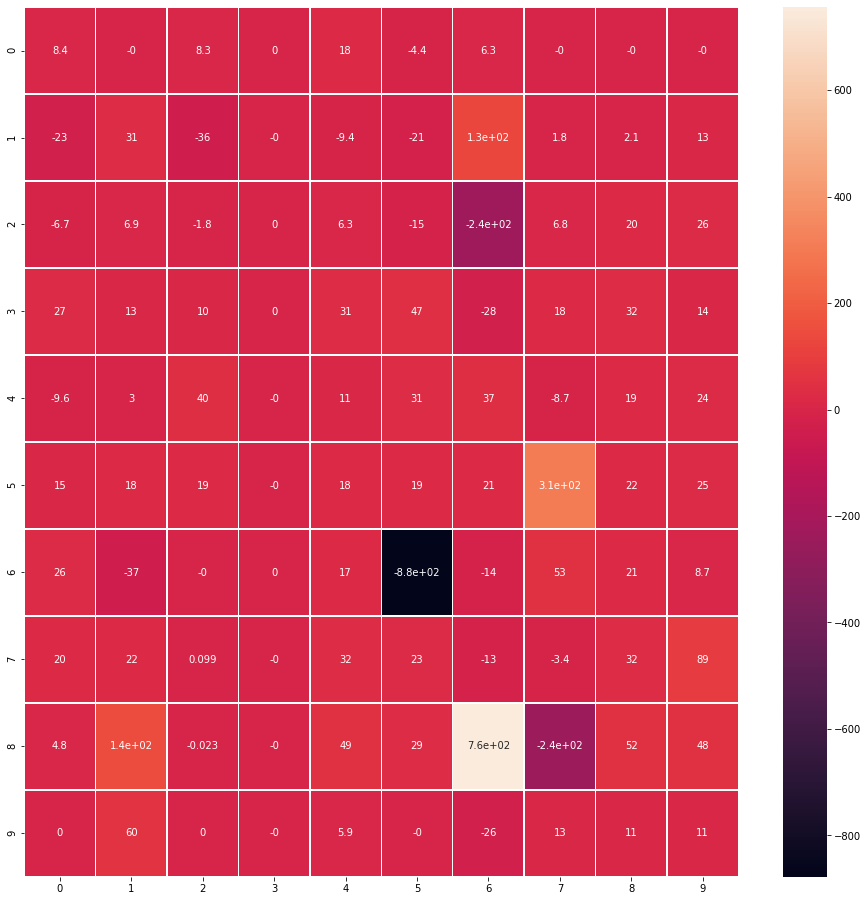

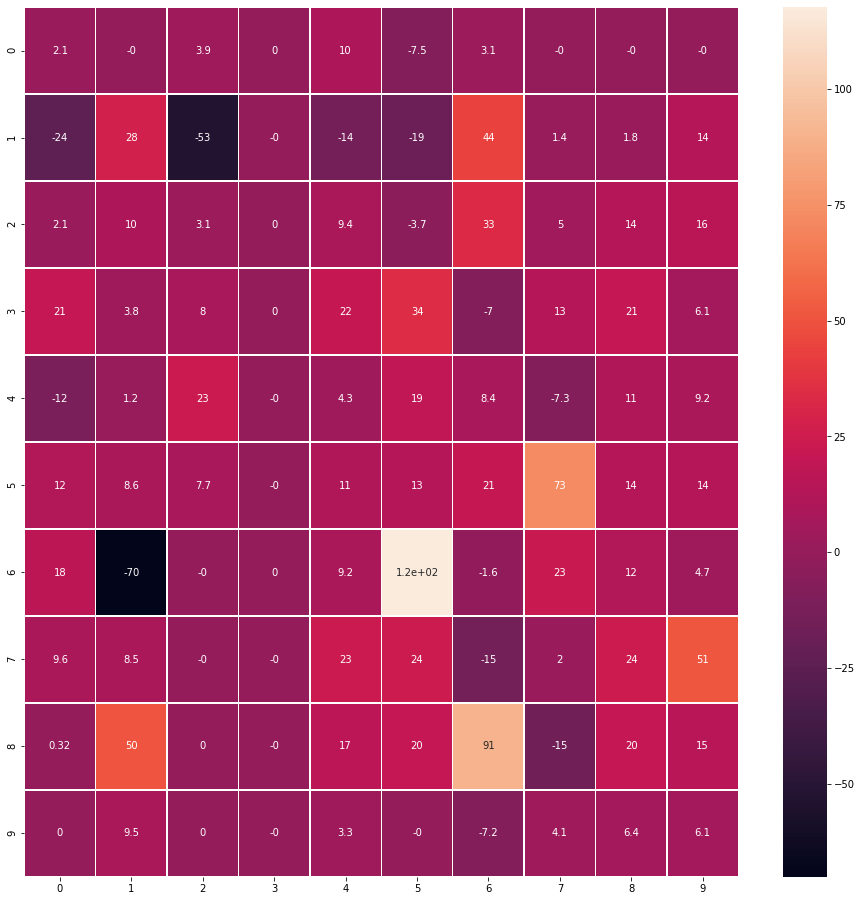

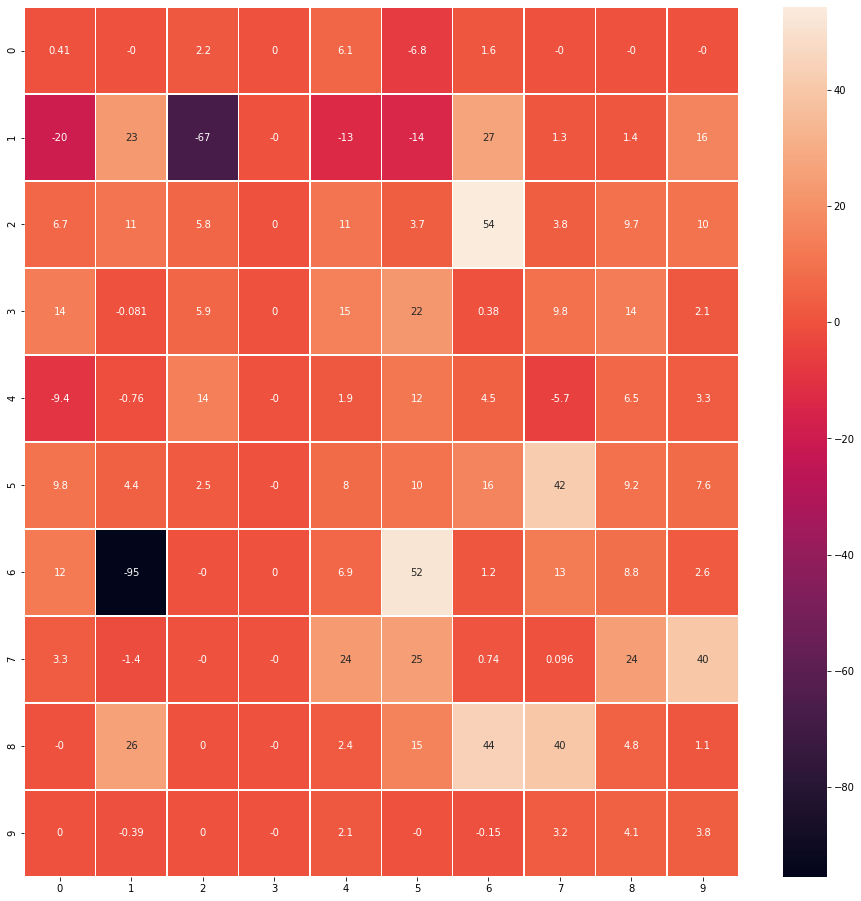

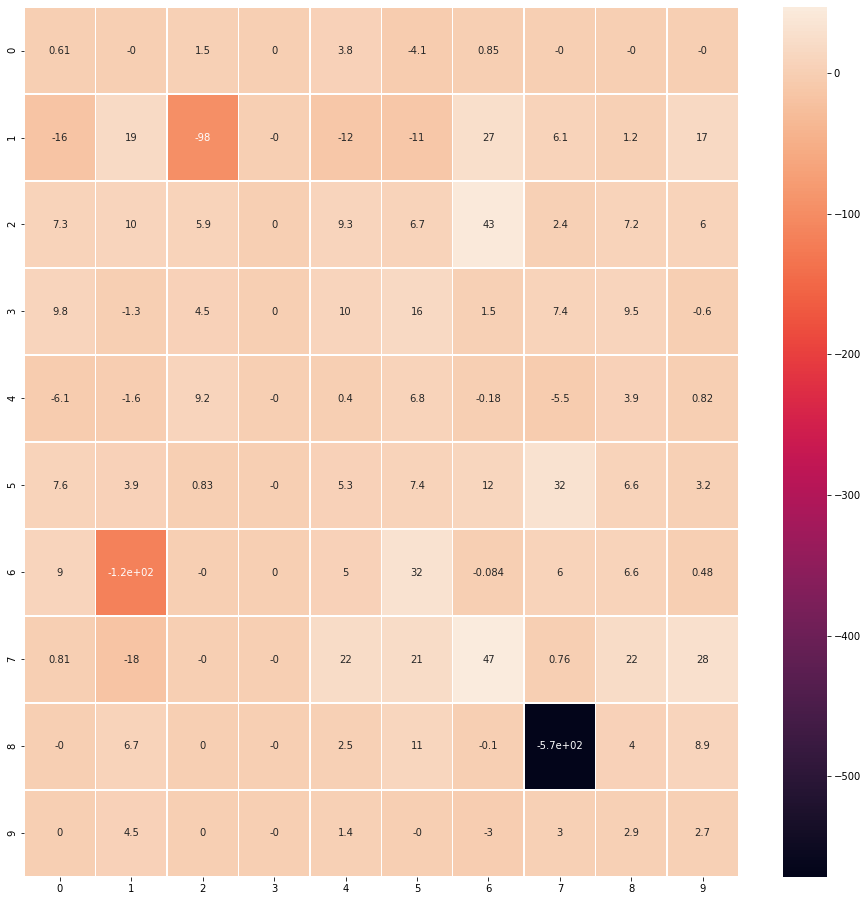

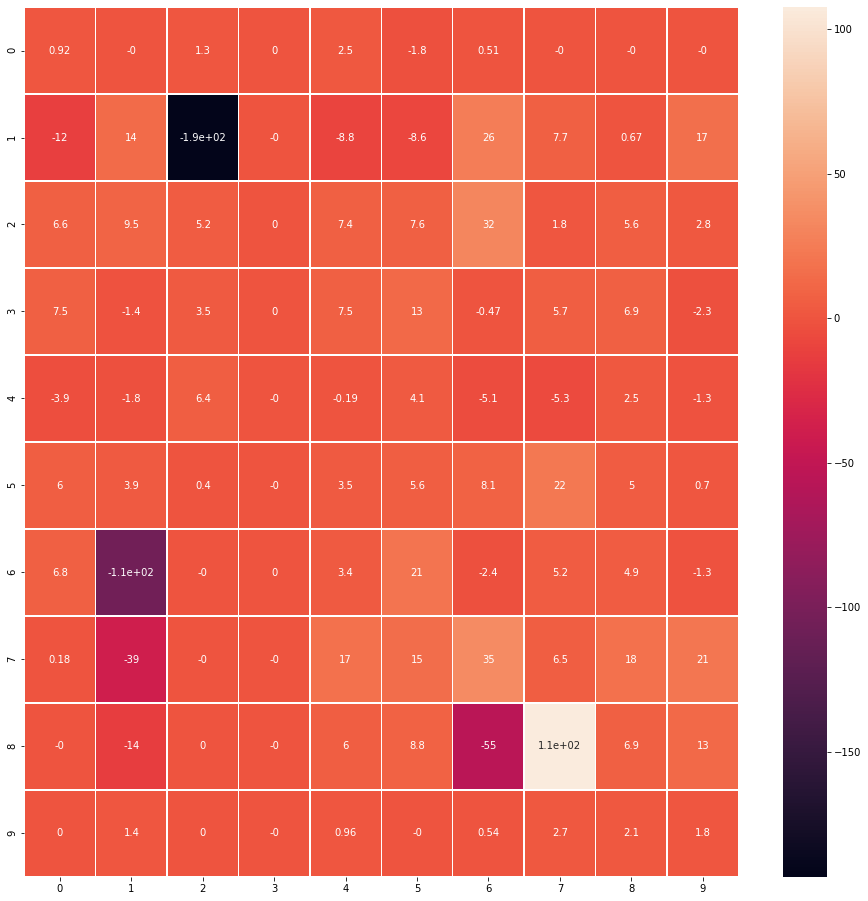

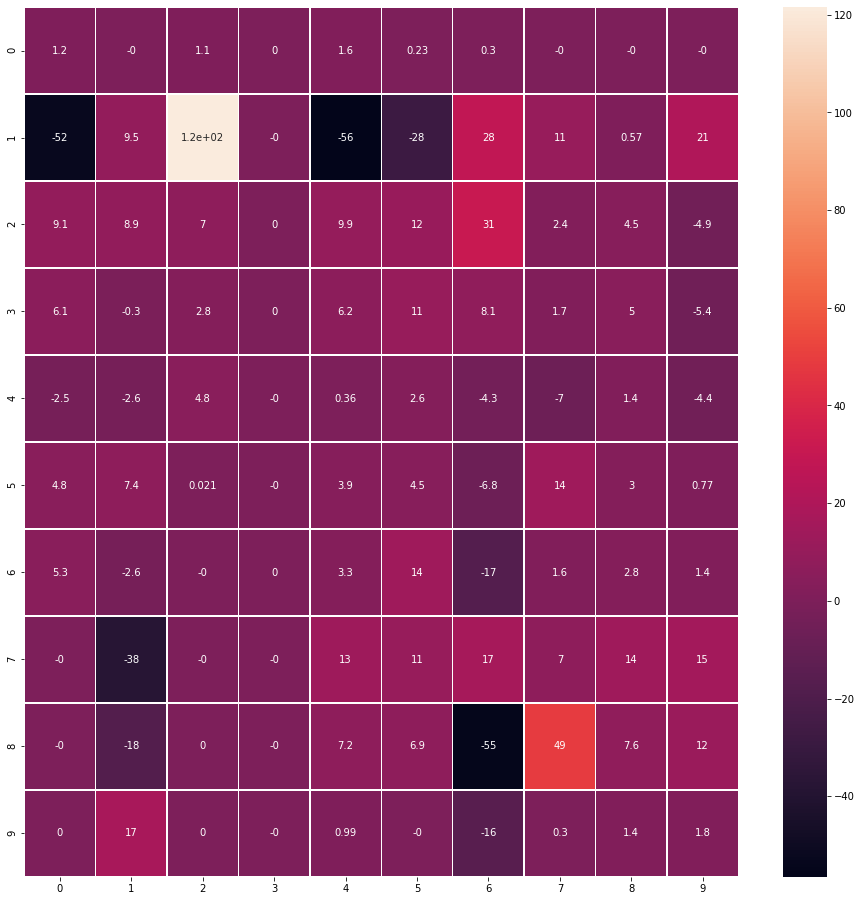

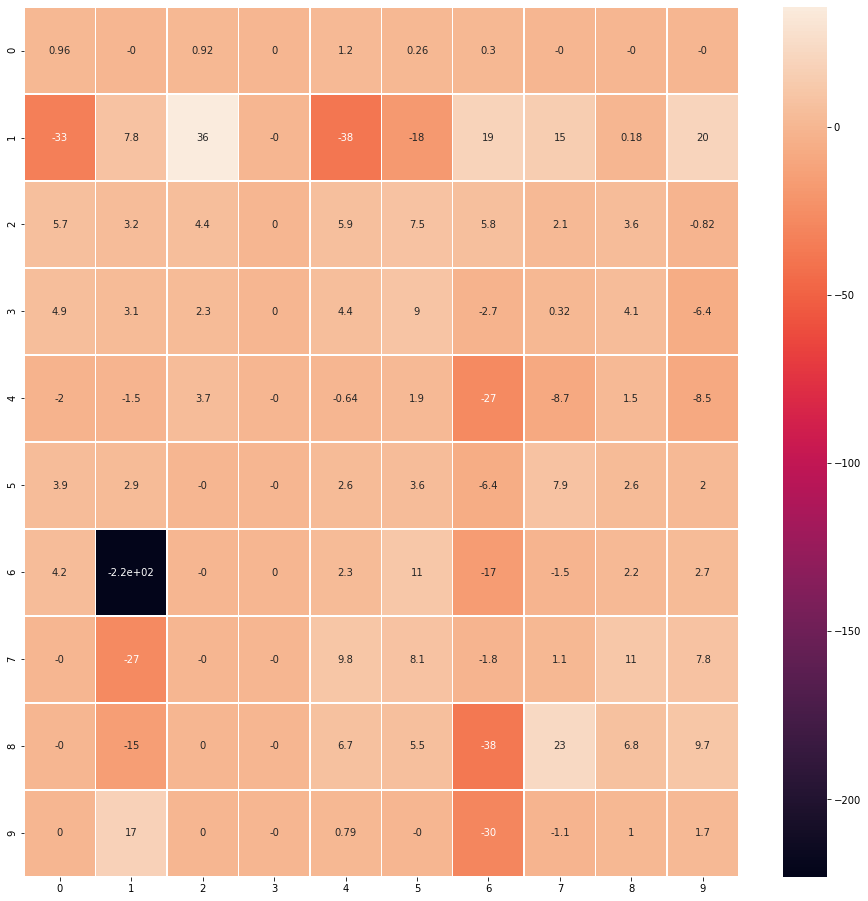

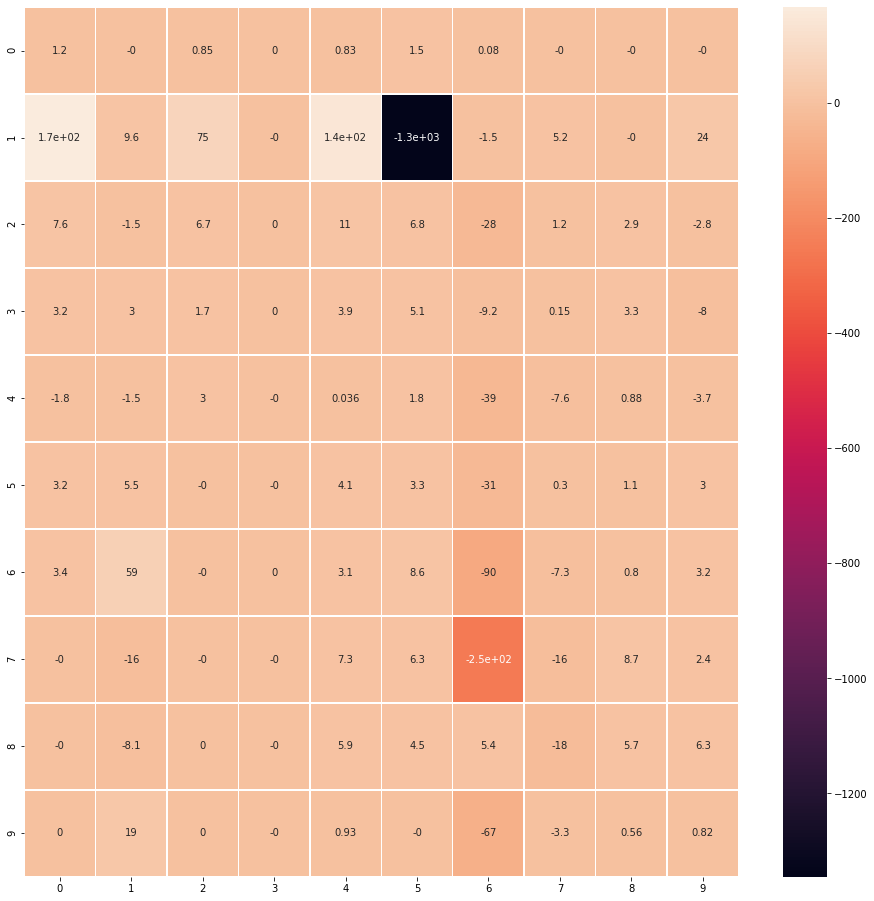

In [0]:
record_tracker.dump_all_weights()

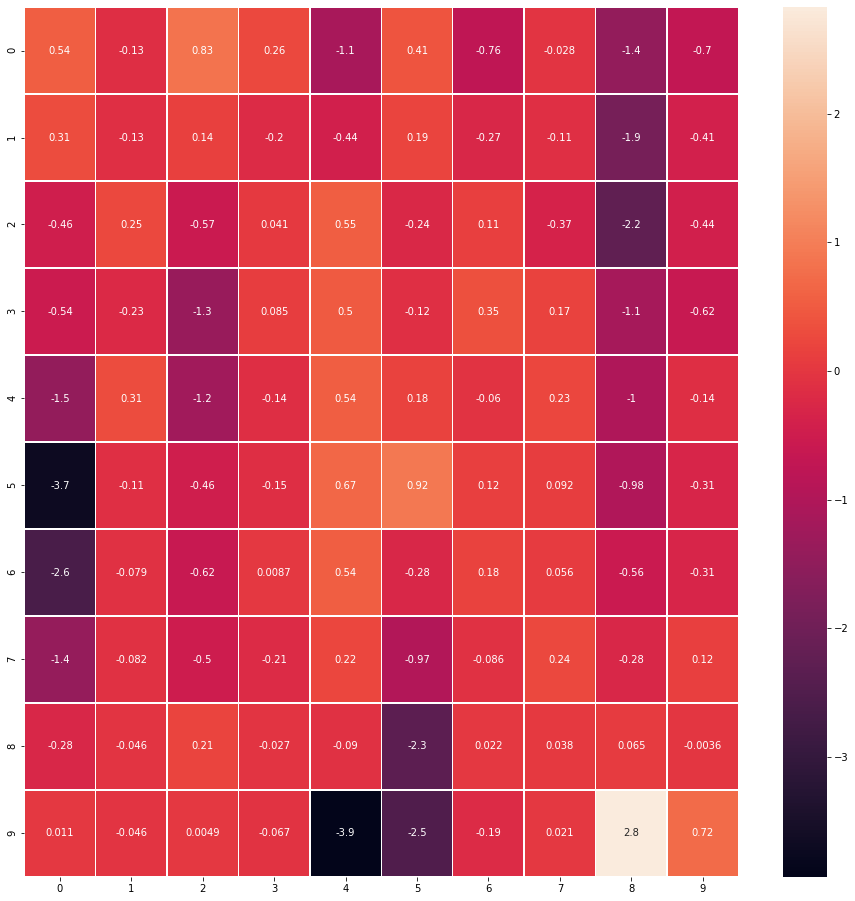

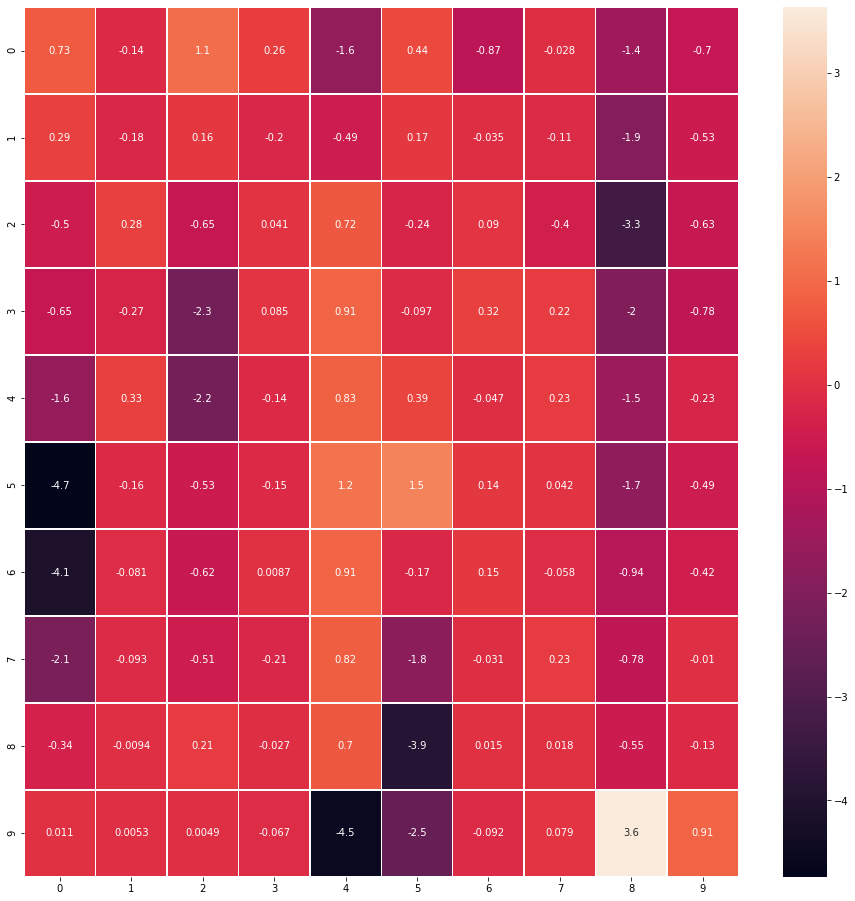

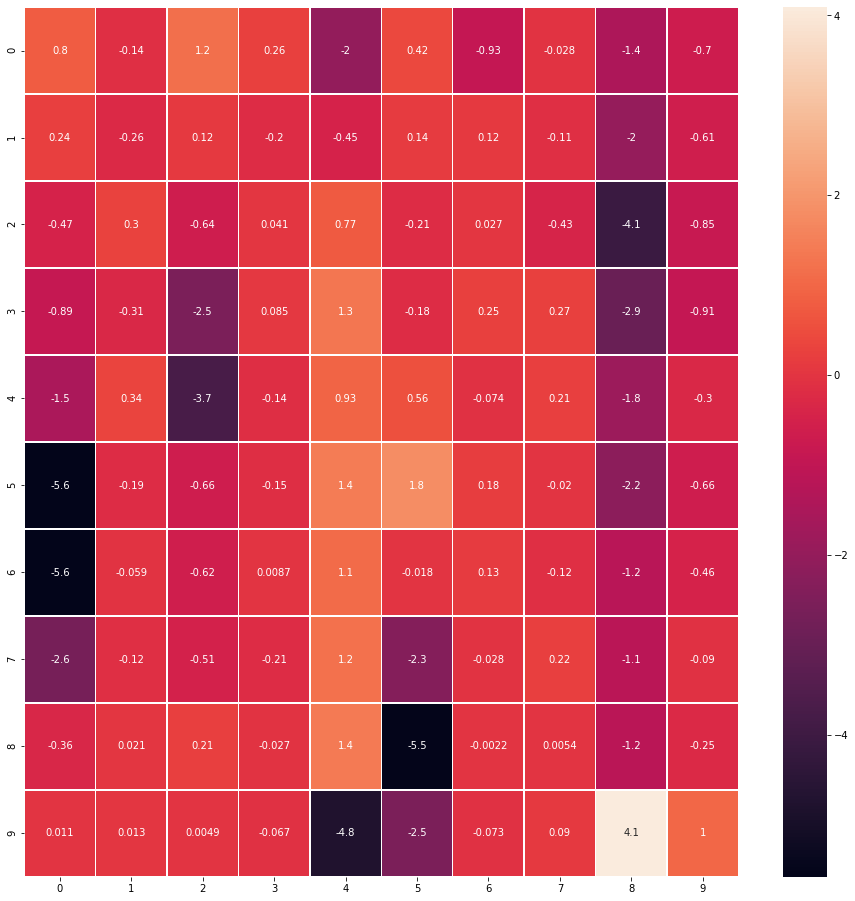

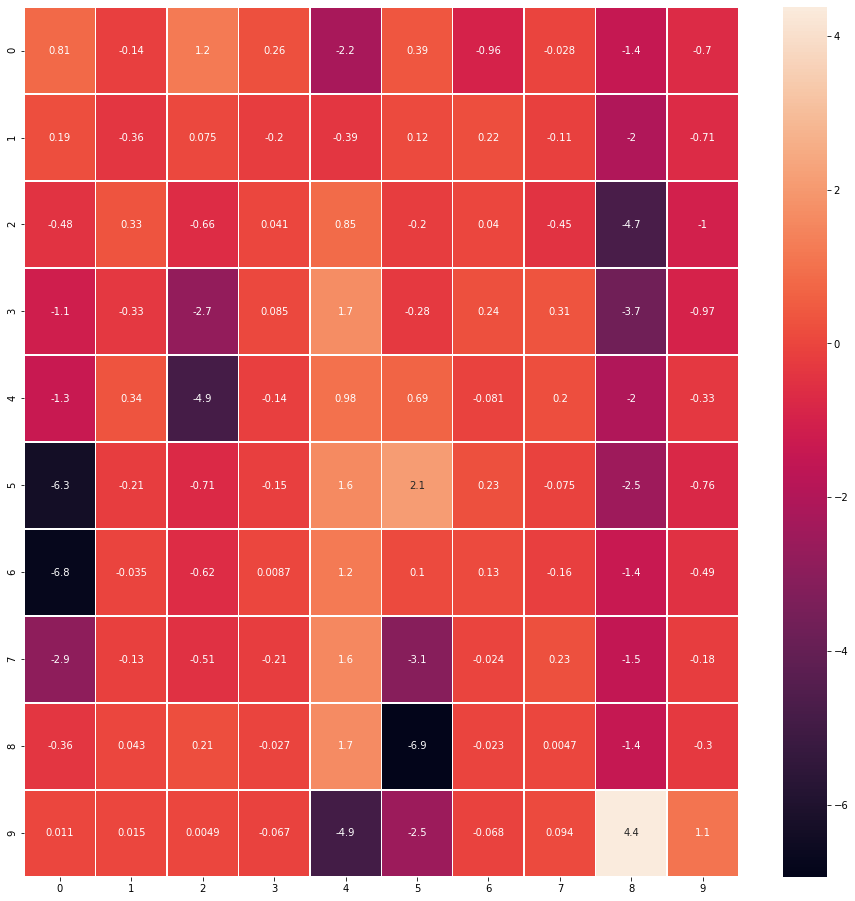

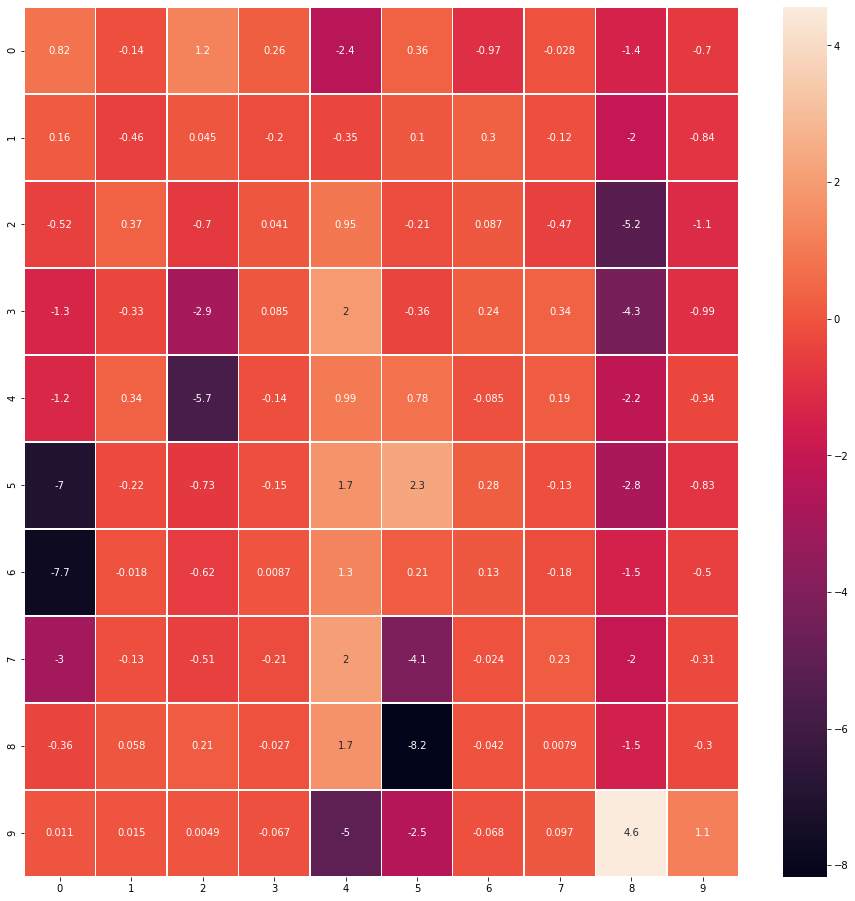

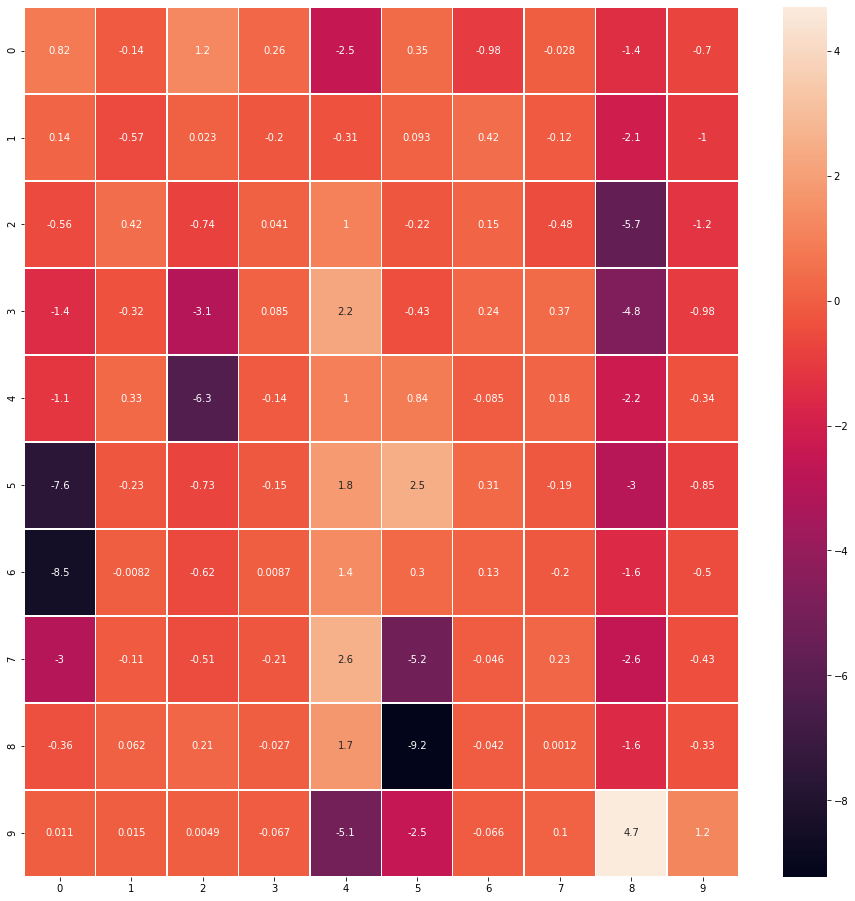

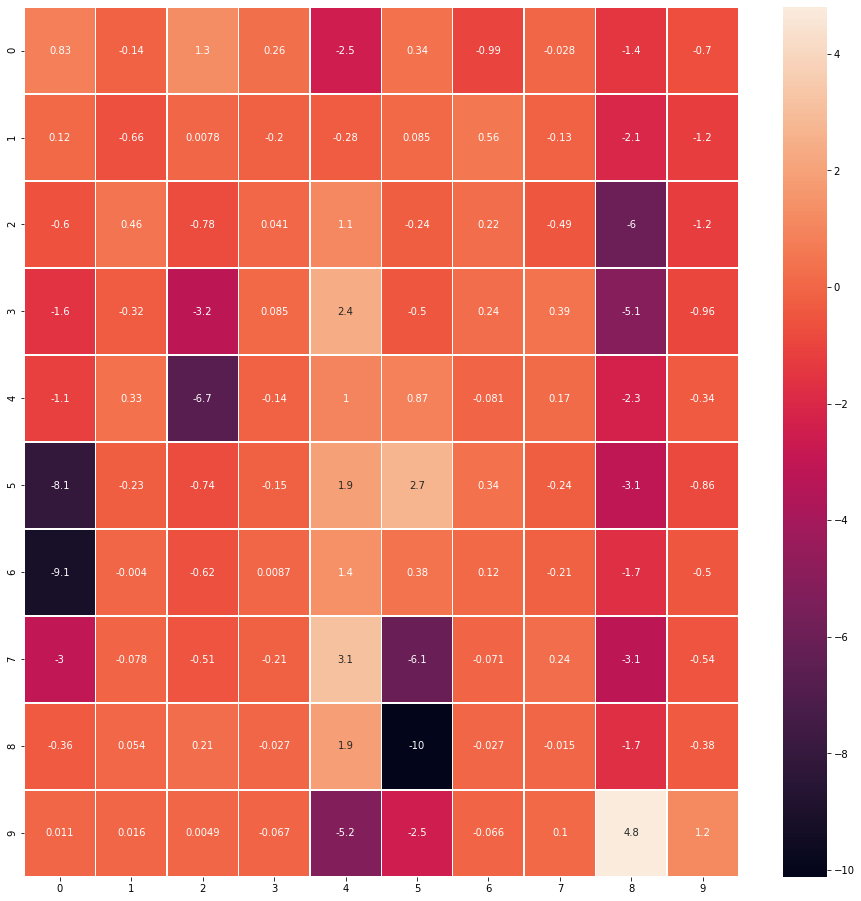

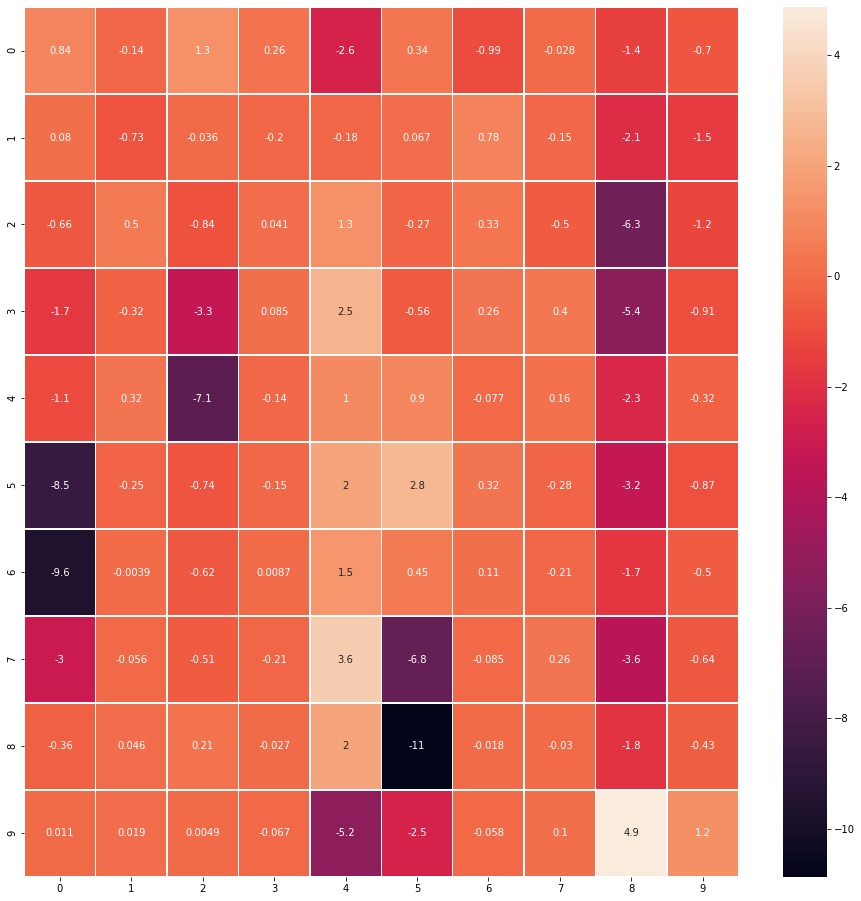

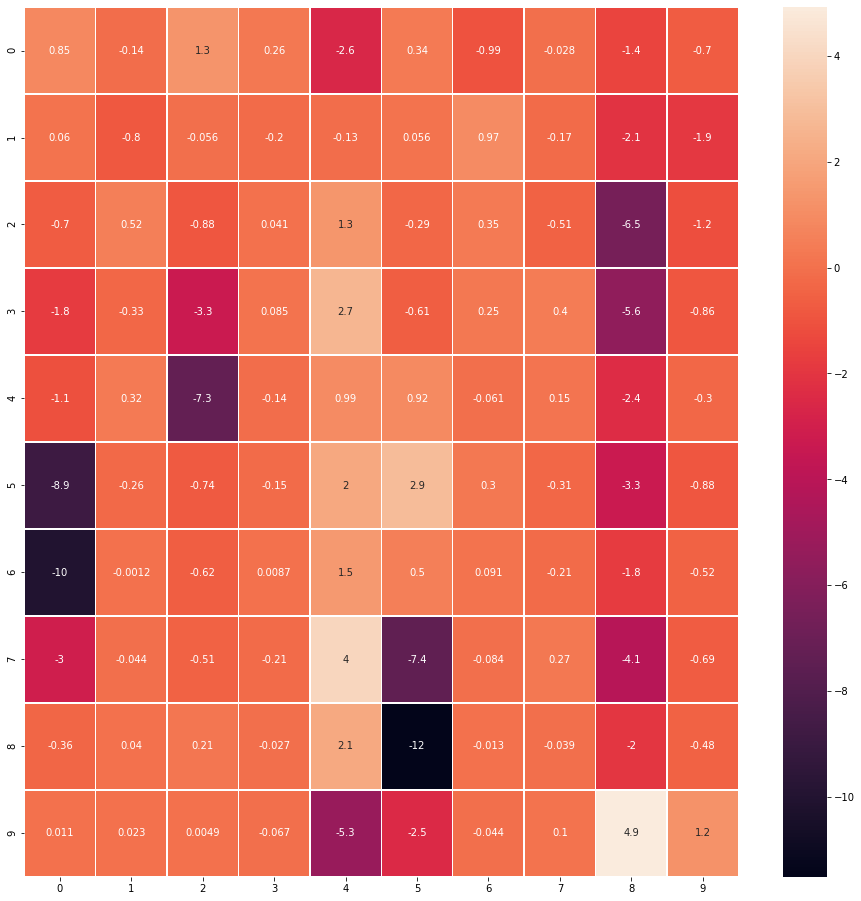

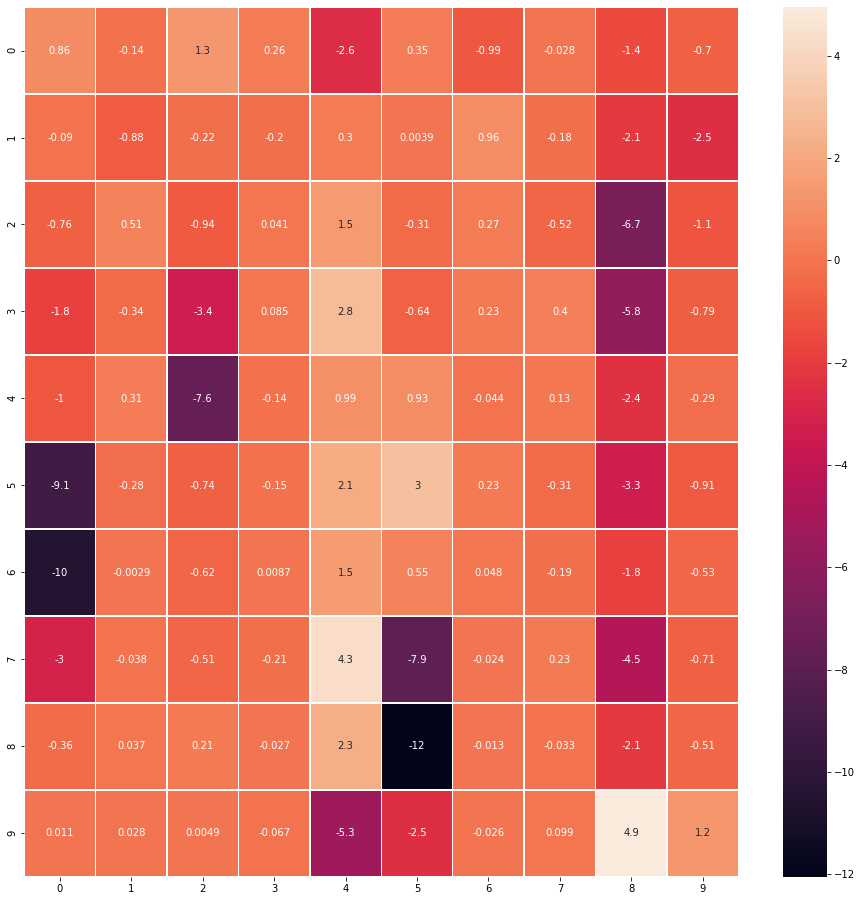

In [0]:
tensor_list = record_tracker.rec_dic[1]
for i,t in enumerate(tensor_list):
        if i>1:
          record_tracker.show_tensor(tensor_list[i])